In [25]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA



import warnings

# Suprimimos los warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:

df = pd.read_excel("data.xlsx")


# Variables socio demográficas

In [ ]:

columnas = ["woman_1", "departamento", "municipio", "rural_1", "raza", "ocupacion", "educacion", "seguridad"]

resultados = []

for col in columnas:
    freq = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100
    for cat in freq.index:
        resultados.append([col, cat, freq[cat], perc[cat]])
    resultados.append([''] * 4)  

df_demograficas = pd.DataFrame(resultados, columns=["Variable", "categorias", "n", "%"])

df_demograficas.to_excel("demograficas.xlsx", index=False)




# Variables sociodemográficas por grupo

In [ ]:
columnas = ["woman_1", "departamento", "municipio", "rural_1", "raza", "ocupacion", "educacion", "seguridad"]

def generar_datos():
    datos = []
    for col in columnas:
        # Crear tabla de contingencia
        contingency = pd.crosstab(df[col], df['grave'])
        
        # Realizar prueba de chi2
        chi2, p, _, _ = chi2_contingency(contingency)
        
        for cat in contingency.index:
            datos.append([col, cat, 
                          contingency.loc[cat, 'Yes'], 
                          contingency.loc[cat, 'Yes'] / df[df['grave'] == 1].shape[0] * 100,
                          contingency.loc[cat, 'No'],
                          contingency.loc[cat, 'No'] / df[df['grave'] == 0].shape[0] * 100,
                          p if cat == contingency.index[0] else ''])  # Añadir p-valor solo en la primera fila de cada variable
        datos.append([''] * 7)
    return datos

# Generar datos y crear dataframe de resultados
resultados = generar_datos()
df_demograficas_grupo = pd.DataFrame(resultados, columns=["Variable", "categorias", "n_grave", "%_grave", "n_no_grave", "#_no_grave", "p-valor"])

df_demograficas_grupo.to_excel("demograficas_grupo.xlsx", index=False)




# Variables diagnóstico

In [ ]:
columnas = ['ns1', 'igm', 'igg', 'pcr_dx', 'serotipo', 'tipo', 'grave', 'infeccion', 'comorbilidad', 'hypertension', 'diabetes', 'dyslipidemia', 'cardiovascular', 'kidney', 'autoimmune', 'liver', 'asthma', 'neoplasia', 'hypothyroidism', 'anemia', 'obesity', 'coinfeccion', 'malaria', 'leptospirosis']

resultados = []

for col in columnas:
    freq = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100
    for cat in freq.index:
        resultados.append([col, cat, freq[cat], perc[cat]])
    resultados.append([''] * 4)  

df_diagnostico = pd.DataFrame(resultados, columns=["Variable", "categorias", "n", "%"])

df_diagnostico.to_excel("diagnostico.xlsx", index=False)



# Variables diagnóstico por grupo

In [ ]:
columnas = ['ns1', 'igm', 'igg', 'pcr_dx', 'serotipo', 'tipo', 'infeccion', 'comorbilidad', 'hypertension', 'diabetes', 'dyslipidemia', 'cardiovascular', 'kidney', 'autoimmune', 'liver', 'asthma', 'neoplasia', 'hypothyroidism', 'anemia', 'obesity', 'coinfeccion', 'malaria', 'leptospirosis']

def generar_datos():
    datos = []
    for col in columnas:
        # Crear tabla de contingencia
        contingency = pd.crosstab(df[col], df['grave'])
        
        # Realizar prueba de chi2
        chi2, p, _, _ = chi2_contingency(contingency)
        
        for cat in contingency.index:
            datos.append([col, cat, 
                          contingency.loc[cat, 'Yes'], 
                          contingency.loc[cat, 'Yes'] / df[df['grave'] == 'Yes'].shape[0] * 100,
                          contingency.loc[cat, 'No'],
                          contingency.loc[cat, 'No'] / df[df['grave'] == 'No'].shape[0] * 100,
                          p if cat == contingency.index[0] else ''])  # Añadir p-valor solo en la primera fila de cada variable
        datos.append([''] * 7)
    return datos

# Generar datos y crear dataframe de resultados
resultados = generar_datos()
df_diagnostico_grupo = pd.DataFrame(resultados, columns=["Variable", "categorias", "n_grave", "%_grave", "n_no_grave", "#_no_grave", "p-valor"])

df_diagnostico_grupo.to_excel("diagnostico_grupo.xlsx", index=False)



# Variables de síntomas

In [ ]:
columnas = ["fiebre", "cefalea", "dolor_retro", "dolor_abdo", "nauseas", "diarrea", "astenia", "fatiga", "mareo", "escalofrio", "mialgias", "artralgias", "exantema", "prurito", "ictericia", "edame_cara", "edema_extre", "adenopatias", "petequias", "epistaxis", "hemo_gingi", "equimosis", "torniquete", "tos", "congestion_nasal", "dolor_garganta", "dolor_abdo_intenso", "vomito_persistente", "acumulacion_liquidos", "ascitis", "derrame_pleural", "derrame_pericardico", "dificultad_respiratoria", "sangrado_mucosas", "irritabilidad", "convulsion", "lipotomia", "hepatomegalia", "esplenomegalia", "deshidratacion", "hipovolemia", "choque", "falla_renal", "falla_respiratoria", "falla_hepatica", "extremidades_frias", "sangrado_severo", "transfusion", "hematemesis", "melenas", "metrorragia", "sangrado_snc", "miocarditis", "encefalopatia", "alteracion_conciencia", "coagulacion_intravascular", "Alteracion_diuresis2", "Llenado capilar > 2 seg"]

resultados = []

for col in columnas:
    freq = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100
    for cat in freq.index:
        resultados.append([col, cat, freq[cat], perc[cat]])
    resultados.append([''] * 4)  

df_sintomas = pd.DataFrame(resultados, columns=["Variable", "categorias", "n", "%"])

df_sintomas.to_excel("sintomas.xlsx", index=False)



# Variables de síntomas por grupo

In [ ]:
columnas = ["fiebre", "cefalea", "dolor_retro", "dolor_abdo", "nauseas", "diarrea", "astenia", "fatiga", "mareo", "escalofrio", "mialgias", "artralgias", "exantema", "prurito", "ictericia", "edame_cara", "edema_extre", "adenopatias", "petequias", "epistaxis", "hemo_gingi", "equimosis", "torniquete", "tos", "congestion_nasal", "dolor_garganta", "dolor_abdo_intenso", "vomito_persistente", "acumulacion_liquidos", "ascitis", "derrame_pleural", "derrame_pericardico", "dificultad_respiratoria", "sangrado_mucosas", "irritabilidad", "convulsion", "lipotomia", "hepatomegalia", "esplenomegalia", "deshidratacion", "hipovolemia", "choque", "falla_renal", "falla_respiratoria", "falla_hepatica", "extremidades_frias", "sangrado_severo", "transfusion", "hematemesis", "melenas", "metrorragia", "sangrado_snc", "miocarditis", "encefalopatia", "alteracion_conciencia", "coagulacion_intravascular", "Alteracion_diuresis2", "Llenado capilar > 2 seg"]

def generar_datos():
    datos = []
    for col in columnas:
        # Crear tabla de contingencia
        contingency = pd.crosstab(df[col], df['grave'])
        
        # Realizar prueba de chi2
        chi2, p, _, _ = chi2_contingency(contingency)
        
        for cat in contingency.index:
            # Check if 'Yes' and 'No' are in the columns before accessing them
            yes_count = contingency.loc[cat, 'Yes'] if 'Yes' in contingency.columns else 0
            no_count = contingency.loc[cat, 'No'] if 'No' in contingency.columns else 0
            
            yes_percentage = yes_count / df[df['grave'] == 'Yes'].shape[0] * 100 if 'Yes' in df['grave'].values else 0
            no_percentage = no_count / df[df['grave'] == 'No'].shape[0] * 100 if 'No' in df['grave'].values else 0
            
            datos.append([col, cat, 
                          yes_count, 
                          yes_percentage,
                          no_count,
                          no_percentage,
                          p if cat == contingency.index[0] else ''])  # Añadir p-valor solo en la primera fila de cada variable
        datos.append([''] * 7)
    return datos


# Generar datos y crear dataframe de resultados
resultados = generar_datos()
df_sintomas_grupo = pd.DataFrame(resultados, columns=["Variable", "categorias", "n_grave", "%_grave", "n_no_grave", "#_no_grave", "p-valor"])

df_sintomas_grupo.to_excel("sintomas_grupo.xlsx", index=False)



# Variables de tratamiento

In [ ]:
columnas = ["Requirio_hospitalización", "UCE", "Requirio_UCI", "Fluidoterapia", "Cristaloides", "coloides", "Antipireticos", "Analgesicos", "Antibioticos", "AINES", "Dipirona"]

resultados = []

for col in columnas:
    freq = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100
    for cat in freq.index:
        resultados.append([col, cat, freq[cat], perc[cat]])
    resultados.append([''] * 4)  

df_tratamiento = pd.DataFrame(resultados, columns=["Variable", "categorias", "n", "%"])

df_tratamiento.to_excel("tratamiento.xlsx", index=False)



# Variables de tratamiento por grupos

In [ ]:
columnas = ["Requirio_hospitalización", "UCE", "Requirio_UCI", "Fluidoterapia", "Cristaloides", "coloides", "Antipireticos", "Analgesicos", "Antibioticos", "AINES", "Dipirona"]

def generar_datos():
    datos = []
    for col in columnas:
        # Crear tabla de contingencia
        contingency = pd.crosstab(df[col], df['grave'])
        
        # Realizar prueba de chi2
        chi2, p, _, _ = chi2_contingency(contingency)
        
        for cat in contingency.index:
            # Check if 'Yes' and 'No' are in the columns before accessing them
            yes_count = contingency.loc[cat, 'Yes'] if 'Yes' in contingency.columns else 0
            no_count = contingency.loc[cat, 'No'] if 'No' in contingency.columns else 0
            
            yes_percentage = yes_count / df[df['grave'] == 'Yes'].shape[0] * 100 if 'Yes' in df['grave'].values else 0
            no_percentage = no_count / df[df['grave'] == 'No'].shape[0] * 100 if 'No' in df['grave'].values else 0
            
            datos.append([col, cat, 
                          yes_count, 
                          yes_percentage,
                          no_count,
                          no_percentage,
                          p if cat == contingency.index[0] else ''])  # Añadir p-valor solo en la primera fila de cada variable
        datos.append([''] * 7)
    return datos


# Generar datos y crear dataframe de resultados
resultados = generar_datos()
df_tratamiento_grupo = pd.DataFrame(resultados, columns=["Variable", "categorias", "n_grave", "%_grave", "n_no_grave", "#_no_grave", "p-valor"])

df_tratamiento_grupo.to_excel("tratamiento_grupo.xlsx", index=False)


In [ ]:
columnas = ["Requirio_hospitalización", "UCE", "Requirio_UCI", "Fluidoterapia", "Cristaloides", "coloides", "Antipireticos", "Analgesicos", "Antibioticos", "AINES", "Dipirona"]

resultados = []

for col in columnas:
    freq = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100
    for cat in freq.index:
        resultados.append([col, cat, freq[cat], perc[cat]])
    resultados.append([''] * 4)  

df_tratamiento = pd.DataFrame(resultados, columns=["Variable", "categorias", "n", "%"])

df_tratamiento.to_excel("tratamiento.xlsx", index=False)


In [ ]:
columnas = ["Requirio_hospitalización", "UCE", "Requirio_UCI", "Fluidoterapia", "Cristaloides", "coloides", "Antipireticos", "Analgesicos", "Antibioticos", "AINES", "Dipirona"]

def generar_datos():
    datos = []
    for col in columnas:
        # Crear tabla de contingencia
        contingency = pd.crosstab(df[col], df['grave'])
        
        # Realizar prueba de chi2
        chi2, p, _, _ = chi2_contingency(contingency)
        
        for cat in contingency.index:
            # Check if 'Yes' and 'No' are in the columns before accessing them
            yes_count = contingency.loc[cat, 'Yes'] if 'Yes' in contingency.columns else 0
            no_count = contingency.loc[cat, 'No'] if 'No' in contingency.columns else 0
            
            yes_percentage = yes_count / df[df['grave'] == 'Yes'].shape[0] * 100 if 'Yes' in df['grave'].values else 0
            no_percentage = no_count / df[df['grave'] == 'No'].shape[0] * 100 if 'No' in df['grave'].values else 0
            
            datos.append([col, cat, 
                          yes_count, 
                          yes_percentage,
                          no_count,
                          no_percentage,
                          p if cat == contingency.index[0] else ''])  # Añadir p-valor solo en la primera fila de cada variable
        datos.append([''] * 7)
    return datos


# Generar datos y crear dataframe de resultados
resultados = generar_datos()
df_tratamiento_grupo = pd.DataFrame(resultados, columns=["Variable", "categorias", "n_grave", "%_grave", "n_no_grave", "#_no_grave", "p-valor"])

df_tratamiento_grupo.to_excel("tratamiento_grupo.xlsx", index=False)

In [7]:
# Lista de variables para analizar
variables = [
    "edad", "PA_Sistólica", "PA_Diastólica", "Presion_Arterial_Media", "Presion_de_pulso",
    "Frecuencia_cardiaca", "Frecuencia_Respiratoria", "Saturacion02", "hemo", "hema", "plaquetas",
    "leucos", "neutrofilos", "linfocitos", "eosinofilos", "basofilos", "ast", "alt", "pcr",
    "creatinina", "bun", "tp", "ttp"
]

# Preparando el DataFrame para guardar los descriptivos y el resultado de la prueba U de Mann-Whitney
column_names = ["Variable", "Grupo", "Mínimo", "Máximo", "Mediana", "P25", "P75", "RIQ", "Mann-Whitney U", "p-valor"]
descriptivos = pd.DataFrame(columns=column_names)

# Función para calcular rango intercuartílico, los percentiles 25 y 75, y la prueba U de Mann-Whitney
def calcular_descriptivos(group1, group2, var_name):
    # We drop NaNs and ensure both groups have data
    group1 = group1.dropna()
    group2 = group2.dropna()

    if not group1.empty and not group2.empty:
        min_val_1 = group1.min()
        max_val_1 = group1.max()
        mediana_1 = group1.median()
        p25_1 = group1.quantile(0.25)
        p75_1 = group1.quantile(0.75)
        riq_1 = p75_1 - p25_1

        min_val_2 = group2.min()
        max_val_2 = group2.max()
        mediana_2 = group2.median()
        p25_2 = group2.quantile(0.25)
        p75_2 = group2.quantile(0.75)
        riq_2 = p75_2 - p25_2

        # Check if we have enough unique values to perform the test
        if group1.nunique() > 1 and group2.nunique() > 1:
            u_statistic, p_value = mannwhitneyu(group1, group2)
        else:
            u_statistic, p_value = np.nan, np.nan  # Use np.nan instead of None for pandas DataFrame compatibility

        # Append the results to the DataFrame
        descriptivos.loc[len(descriptivos)] = [var_name, "No Grave", min_val_1, max_val_1, mediana_1, p25_1, p75_1, riq_1, u_statistic, p_value]
        descriptivos.loc[len(descriptivos)] = [var_name, "Grave", min_val_2, max_val_2, mediana_2, p25_2, p75_2, riq_2, u_statistic, p_value]
    else:
        print(f"Variable '{var_name}' tiene datos insuficientes para la prueba U de Mann-Whitney.")


# Realizamos los cálculos descriptivos para cada grupo y variable
for var in variables:
    group1 = df[df['grave'] == 0][var].dropna()
    group2 = df[df['grave'] == 1][var].dropna()
    
    # Calculamos descriptivos y prueba U de Mann-Whitney para cada grupo
    calcular_descriptivos(group1, group2, var)

# Exportamos los resultados a Excel
descriptivos.to_excel("descriptivos_por_grupo.xlsx", index=False)



# Gráfico

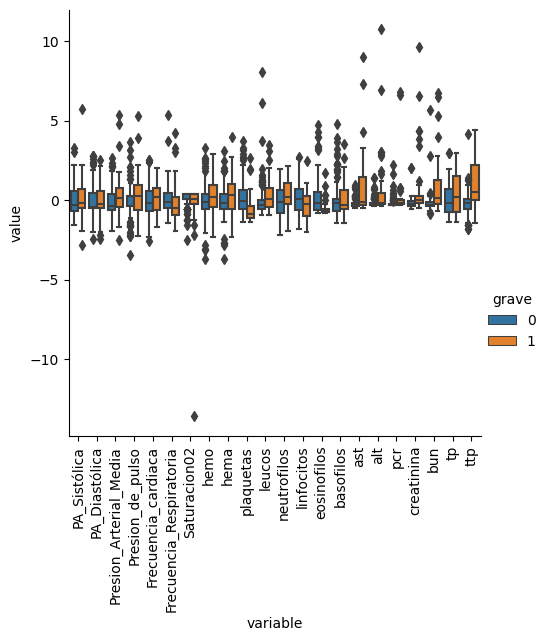

In [3]:
# Análisis descriptivo bivariado para variables cuantitativas vs variable respuesta

numeric_vars = ["PA_Sistólica", "PA_Diastólica", "Presion_Arterial_Media", "Presion_de_pulso", "Frecuencia_cardiaca", "Frecuencia_Respiratoria", "Saturacion02", "hemo", "hema", "plaquetas", "leucos", "neutrofilos", "linfocitos", "eosinofilos", "basofilos", "ast", "alt", "pcr", "creatinina", "bun", "tp", "ttp"]

scaler = StandardScaler()
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

plot = sns.catplot(data=df.melt(id_vars=['grave'], value_vars=numeric_vars), x='variable', y='value', hue='grave', kind='box')

plot.ax.set_xticklabels(plot.ax.get_xticklabels(), rotation=90)

plt.show()

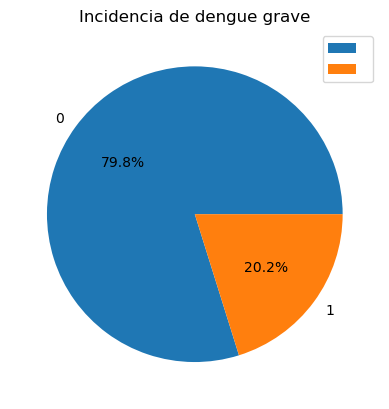

In [4]:
frecuencias = df['grave'].value_counts()

fig, ax = plt.subplots()

pie = ax.pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%')

plt.title("Incidencia de dengue grave")
plt.legend(pie[0], ["", ""], loc="best")

plt.show()

# Modelo predictivo

In [26]:
df = pd.read_excel("data.xlsx")


In [27]:
mejores_columns = [ "edad", 
                   "woman_1", 
                   "rural_1",
                   "primaria_1", 
                   "comorbilidad", 
                   "coinfeccion_1", 
                   "Tiempo_para_consultar", 
                   "Numero_reconsultas", 
                   "AINES",
                   "Dipirona",
                   "PA_Sistólica", 
                   "PA_Diastólica",
                   "Presion_Arterial_Media",
                   "Presion_de_pulso",
                   "Frecuencia_cardiaca",
                   "Frecuencia_Respiratoria",
                   "Saturacion02",
                   "Hipertension",
                   "Hipotension",
                   "Taquicardia",
                   "Bradicardia",
                   "Hipoxemia",
                   "Taquipnea",
                   "Bradipnea",
                   "plaquetas",
                   "hemo",
                   "leucos",
                   "linfocitos",
                   "eosinofilos",
                   "alt",
                   "creatinina",
                   "hema",
                   "neutrofilos",
                   "ast",
                   "bun",
                   "tp",
                   "ttp" ]

mejores = df[mejores_columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   edad                     233 non-null    float64
 1   woman_1                  233 non-null    int64  
 2   rural_1                  233 non-null    int64  
 3   primaria_1               233 non-null    int64  
 4   comorbilidad             233 non-null    int64  
 5   coinfeccion_1            233 non-null    int64  
 6   Tiempo_para_consultar    193 non-null    float64
 7   Numero_reconsultas       217 non-null    float64
 8   AINES                    233 non-null    int64  
 9   Dipirona                 233 non-null    int64  
 10  PA_Sistólica             233 non-null    float64
 11  PA_Diastólica            233 non-null    float64
 12  Presion_Arterial_Media   233 non-null    float64
 13  Presion_de_pulso         233 non-null    float64
 14  Frecuencia_cardiaca      2

In [28]:
target = df["grave"]

predictors = df[["primaria_1", "plaquetas", "leucos", "eosinofilos", "neutrofilos", "ast"]]

In [5]:
import pandas as pd

# Aseguramos que los datos estén en el formato adecuado
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')  # Convierte 'edad' a numérico, gestionando cualquier no numérico como NaN
df['grave'] = df['grave'].astype('category')  # Convierte 'grave' en una variable categórica

# Calcular estadísticas descriptivas por grupo 'grave'
age_descriptive_stats = df.groupby('grave')['edad'].describe()

print(age_descriptive_stats)


       count       mean        std   min  25%   50%   75%   max
grave                                                          
0      186.0  13.054624  11.801253  0.58  6.0  10.0  15.0  70.0
1       47.0  18.327660  18.651095  0.40  6.0  10.0  22.0  84.0


In [29]:
# Imputar valores NaN con la media

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
predictors_imputed = imputer.fit_transform(predictors)

In [30]:
# Escalar los predictores
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors_imputed)


In [31]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, target, test_size=0.2, random_state=42)


In [32]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Definir los modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Resultados de la validación cruzada
model_scores = {}

# Realizar 10-fold cross-validation para cada modelo
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    model_scores[name] = scores
    print(f"{name}: Mean accuracy = {np.mean(scores):.2f}, Standard Deviation = {np.std(scores):.2f}")

# Si deseas más métricas, puedes cambiar el parámetro 'scoring'


Logistic Regression: Mean accuracy = 0.89, Standard Deviation = 0.08
Support Vector Machine: Mean accuracy = 0.87, Standard Deviation = 0.06
Decision Tree: Mean accuracy = 0.81, Standard Deviation = 0.06
Random Forest: Mean accuracy = 0.89, Standard Deviation = 0.04


In [33]:
# Parámetros para optimizar
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],  # 'saga' es necesario para elasticnet y l1
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # add this line
}


grid_search = GridSearchCV(LogisticRegression(max_iter=10000), params, cv=10)
grid_search.fit(X_train, y_train)

# Resultados de la optimización
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score: {grid_search.best_score_:.4f}")

Mejores parámetros: {'C': 1, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Mejor score: 0.8930


In [34]:
best_logreg = grid_search.best_estimator_

# Entrenamiento y predicción
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)

# Evaluación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.88      0.70      0.78        10

    accuracy                           0.91        47
   macro avg       0.90      0.84      0.86        47
weighted avg       0.91      0.91      0.91        47



In [35]:
best_logreg = grid_search.best_estimator_

# Entrenamiento y predicción
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)

# Evaluación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.88      0.70      0.78        10

    accuracy                           0.91        47
   macro avg       0.90      0.84      0.86        47
weighted avg       0.91      0.91      0.91        47



In [36]:
# Predicciones para el conjunto de entrenamiento
y_train_pred = best_logreg.predict(X_train)

# Evaluación en el conjunto de entrenamiento
print("Reporte de clasificación para los datos de ENTRENAMIENTO:")
print(classification_report(y_train, y_train_pred))

# Ya tienes esto, pero lo repito para tenerlo juntos y comparar más fácilmente
print("\nReporte de clasificación para los datos de PRUEBA:")
print(classification_report(y_test, y_pred))

Reporte de clasificación para los datos de ENTRENAMIENTO:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       149
           1       0.84      0.57      0.68        37

    accuracy                           0.89       186
   macro avg       0.87      0.77      0.81       186
weighted avg       0.89      0.89      0.88       186


Reporte de clasificación para los datos de PRUEBA:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.88      0.70      0.78        10

    accuracy                           0.91        47
   macro avg       0.90      0.84      0.86        47
weighted avg       0.91      0.91      0.91        47



In [14]:
# Coeficientes e Intercepto del modelo de Regresión Logística
coef = best_logreg.coef_
intercept = best_logreg.intercept_

# Mostrar los coeficientes y el intercepto
print("Intercepto:", intercept)
print("\nCoeficientes:")
for col, coef_ in zip(predictors.columns, coef[0]):
    print(f"{col}: {coef_}")


Intercepto: [-2.35605052]

Coeficientes:
primaria_1: -0.6959364909214409
plaquetas: -1.3637670537433455
leucos: 0.4566227576763795
eosinofilos: -0.8671458362003621
neutrofilos: 0.945557035125691
ast: 1.2985558927323793


In [15]:
import numpy as np

# Calcula el OR
odds_ratios = np.exp(best_logreg.coef_[0])

# Imprime los OR
print("Odds Ratios:")
for col, or_ in zip(predictors.columns, odds_ratios):
    print(f"{col}: {or_:.4f}")


Odds Ratios:
primaria_1: 0.4986
plaquetas: 0.2557
leucos: 1.5787
eosinofilos: 0.4201
neutrofilos: 2.5742
ast: 3.6640


In [14]:
import pandas as pd

# Crear dataframes para exportar
train_df = pd.concat([pd.DataFrame(X_train, columns=predictors.columns), y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([pd.DataFrame(X_test, columns=predictors.columns), y_test.reset_index(drop=True)], axis=1)

# Exportar a CSV
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)


In [41]:
import statsmodels.api as sm
import pandas as pd

# Convertir los datos escalados a DataFrame
X_train_df = pd.DataFrame(X_train, columns=predictors.columns)

# Añadir una columna constante (intercepto) a los predictores
X_train_sm = sm.add_constant(X_train_df)


# Reiniciar los índices de y_train_numeric
y_train_reset = y_train.reset_index(drop=True)

# Reiniciar los índices de X_train_sm
X_train_sm_reset = X_train_sm.reset_index(drop=True)

# Ahora, ajustemos el modelo de regresión logística nuevamente con los datos con índices reiniciados
logit_model = sm.Logit(y_train_reset, X_train_sm_reset)
result = logit_model.fit()

# Mostrar un resumen del modelo
print(result.summary())

# Calculando los Odds Ratios y sus IC 95%
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
conf = np.exp(conf)

print("\nOdds Ratios y IC 95%:")
print(conf)

# Guardar el resumen y los Odds Ratios en DataFrames
summary_df = pd.DataFrame({
    "coef": result.params,
    "std err": result.bse,
    "z": result.tvalues,
    "P>|z|": result.pvalues,
    "[0.025": result.conf_int().iloc[:, 0],
    "0.975]": result.conf_int().iloc[:, 1]
})

# Crear un archivo Excel con dos hojas: 'Resumen' y 'Odds Ratios'
with pd.ExcelWriter('output.xlsx') as writer:
    summary_df.to_excel(writer, sheet_name='Resumen')
    conf.to_excel(writer, sheet_name='Odds Ratios')

Optimization terminated successfully.
         Current function value: 0.269512
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  grave   No. Observations:                  186
Model:                          Logit   Df Residuals:                      179
Method:                           MLE   Df Model:                            6
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.4598
Time:                        07:34:39   Log-Likelihood:                -50.129
converged:                       True   LL-Null:                       -92.797
Covariance Type:            nonrobust   LLR p-value:                 2.813e-16
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.7821      0.526     -5.287      0.000      -3.813      -1.751
primaria_1     -0.7937    

In [43]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def hosmer_lemeshow_test(y_true, y_pred, n_bins=10):
    data = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    data['bin'] = pd.qcut(data.y_pred, q=n_bins, duplicates='drop')
    obs = data.groupby('bin').y_true.sum()
    total = data.groupby('bin').y_true.count()
    expect = data.groupby('bin').y_pred.sum()
    obs_freq = obs / total
    expect_freq = expect / total
    hl_stat = np.sum((obs - expect)**2 / (expect * (1 - expect_freq)))
    p_value = 1 - chi2.cdf(hl_stat, n_bins - 2)
    return hl_stat, p_value

# Calcular la probabilidad predicha por el modelo
y_pred_probs = result.predict(X_train_sm)

# Realizar la prueba de Hosmer-Lemeshow
hl_stat, p_value = hosmer_lemeshow_test(y_train_reset, y_pred_probs)

print(f'Hosmer-Lemeshow statistic: {hl_stat}')
print(f'P-value: {p_value}')


Hosmer-Lemeshow statistic: 9.29488689880932
P-value: 0.3180336831780046


In [16]:
from sklearn.metrics import roc_auc_score
y_pred_prob = result.predict(X_train_sm_reset)
auc = roc_auc_score(y_train_reset, y_pred_prob)
print(f"AUC: {auc:.2f}")


AUC: 0.91


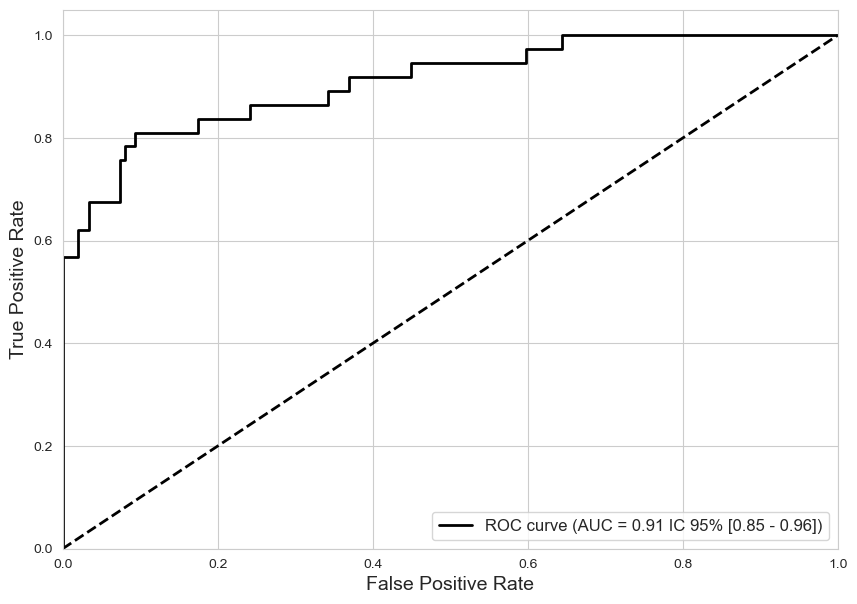

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample

# Bootstrap para AUC
def bootstrap_auc(y_true, y_scores, n_bootstraps=1000, rng_seed=42):
    n_size = len(y_true)
    rng = np.random.default_rng(rng_seed)
    bootstrap_aucs = []

    for _ in range(n_bootstraps):
        # Remuestreo con reemplazo
        indices = rng.choice(range(n_size), size=n_size, replace=True)
        if len(np.unique(y_true[indices])) < 2:
            continue

        score = auc(*roc_curve(y_true[indices], y_scores[indices])[:2])
        bootstrap_aucs.append(score)

    sorted_scores = np.array(bootstrap_aucs)
    sorted_scores.sort()

    # Cálculo de IC 95%
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]

    return (confidence_lower, confidence_upper)

# Estilo Seaborn
sns.set_style("whitegrid")

# Tamaño del gráfico
plt.figure(figsize=(10, 7))

# ROC
fpr, tpr, thresholds = roc_curve(y_train_reset, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Bootstrap para calcular IC 95%
confidence_lower, confidence_upper = bootstrap_auc(y_train_reset, y_pred_prob)

# Gráfico
plt.plot(fpr, tpr, color='black', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f} IC 95% [{confidence_lower:.2f} - {confidence_upper:.2f}])')

# Línea diagonal
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Límites y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('', fontsize=16)

# Leyenda
plt.legend(loc="lower right", fontsize=12)

plt.savefig('roc_curve_high_res.png', dpi=300)

# Mostrar el gráfico
plt.show()


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_sm_reset.values, i) for i in range(X_train_sm_reset.shape[1])]
vif["features"] = X_train_sm_reset.columns
print(vif)


   VIF Factor     features
0    1.002532        const
1    1.034267   primaria_1
2    1.256038         edad
3    1.215048    plaquetas
4    1.047691       leucos
5    1.355123  eosinofilos
6    1.398483  neutrofilos
7    1.081853          ast


In [21]:
# Transforma y ajusta tus datos de prueba de la misma manera que lo hiciste para los de entrenamiento
X_test_df = pd.DataFrame(X_test, columns=predictors.columns)
X_test_sm = sm.add_constant(X_test_df)

# Resetear índices para y_test
y_test_reset = y_test.reset_index(drop=True)

# Predicciones para el conjunto de entrenamiento
y_train_pred_prob = result.predict(X_train_sm_reset)
y_train_pred = [1 if prob > 0.5 else 0 for prob in y_train_pred_prob]

# Predicciones para el conjunto de prueba
y_test_pred_prob = result.predict(X_test_sm)
y_test_pred = [1 if prob > 0.5 else 0 for prob in y_test_pred_prob]

# Matrices de confusión
from sklearn.metrics import confusion_matrix

# Matriz de confusión para datos de entrenamiento
cm_train = confusion_matrix(y_train_reset, y_train_pred)
print("Matriz de confusión para los datos de ENTRENAMIENTO:")
print(cm_train)

# Matriz de confusión para datos de prueba
cm_test = confusion_matrix(y_test_reset, y_test_pred)
print("\nMatriz de confusión para los datos de PRUEBA:")
print(cm_test)


Matriz de confusión para los datos de ENTRENAMIENTO:
[[144   5]
 [ 13  24]]

Matriz de confusión para los datos de PRUEBA:
[[35  2]
 [ 3  7]]


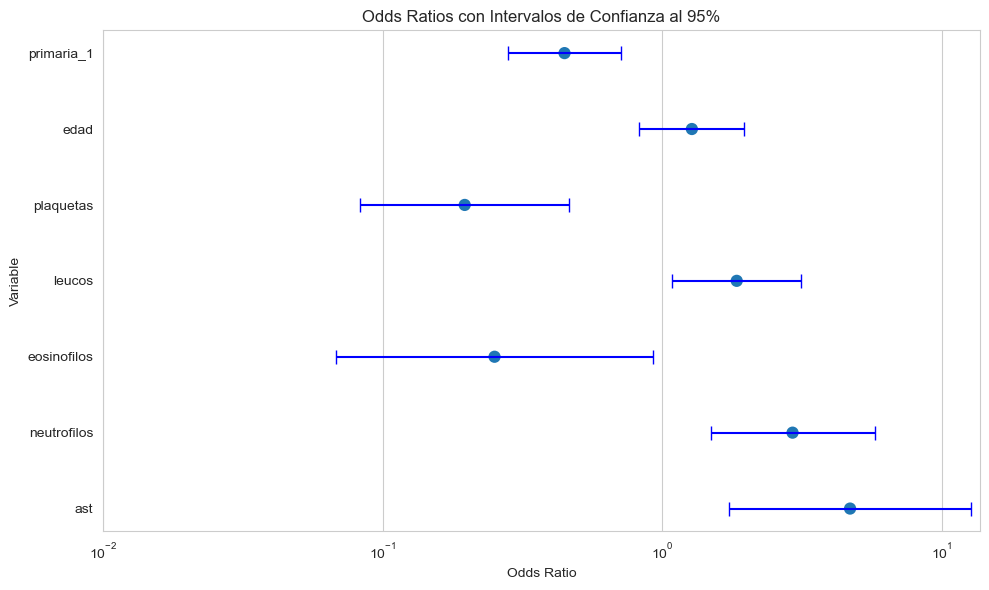

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Elimina el intercepto de 'conf'
conf_no_intercept = conf.drop("const")

# Establecer estilo
sns.set_style("whitegrid")

# Crear el gráfico
plt.figure(figsize=(10, 6))  # Ajusta el tamaño según lo necesites

# Dibuja los puntos para los Odds Ratios
sns.pointplot(x=conf_no_intercept['OR'], y=conf_no_intercept.index, join=False)

# Dibuja los intervalos de confianza
plt.errorbar(conf_no_intercept['OR'], conf_no_intercept.index, 
             xerr=(conf_no_intercept['OR'] - conf_no_intercept['2.5%'], 
                   conf_no_intercept['97.5%'] - conf_no_intercept['OR']), 
             fmt='none', capsize=5, color='blue')

# Establecer la escala del eje x en logarítmico para mejor visualización
plt.xscale('log')

# Ajusta los límites del eje x
plt.xlim(0.01, conf_no_intercept['97.5%'].max() + 1)

# Etiquetas y título
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Odds Ratios con Intervalos de Confianza al 95%')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


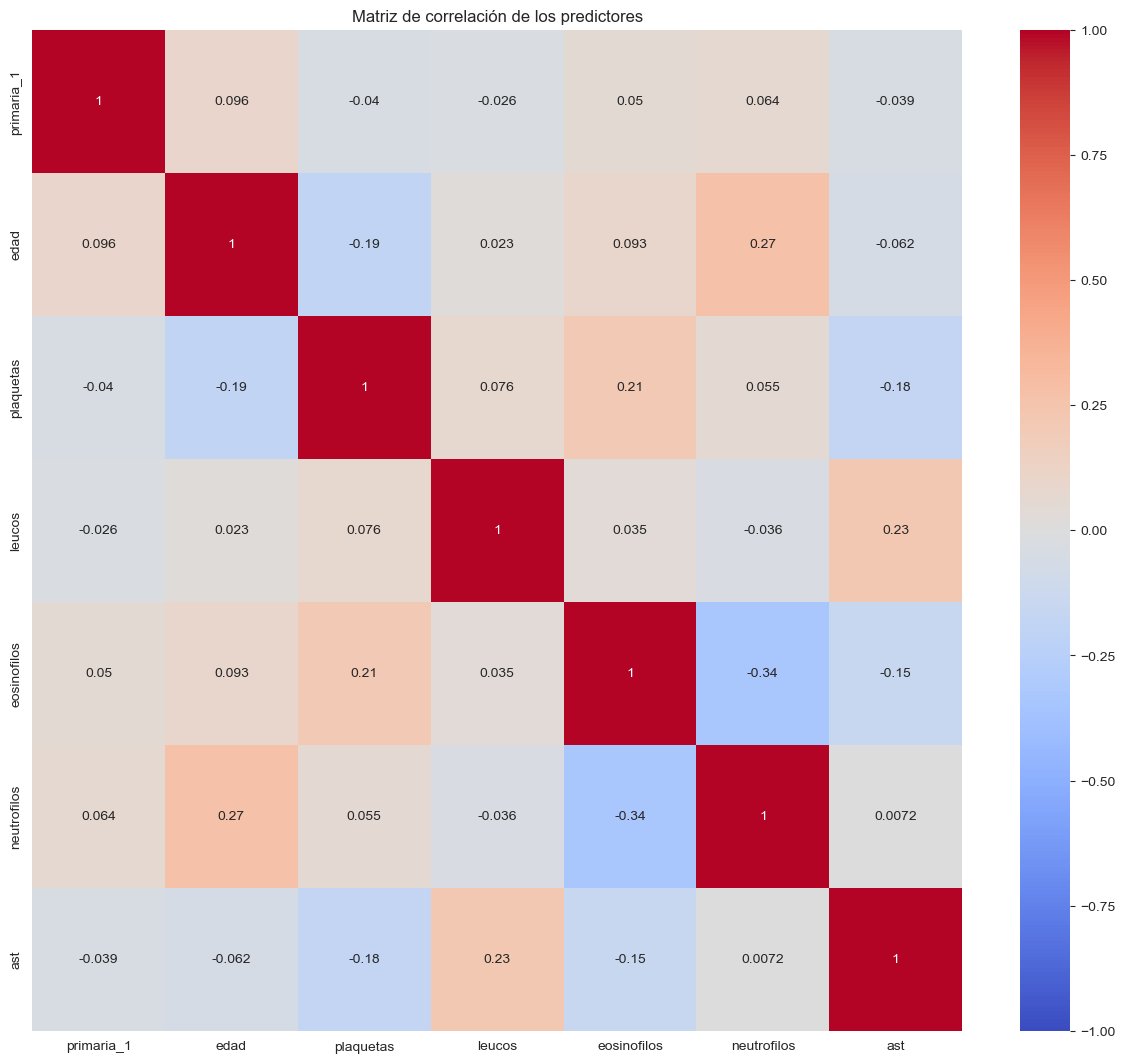

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = predictors.corr()

# Dibuja un heatmap de la matriz de correlación
plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación de los predictores")
plt.show()

